In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import copy

import numpy as np
import torch
from tqdm import tqdm

import matplotlib.pyplot as plt 

import stable_baselines3
from stable_baselines3 import DDPG, SAC, PPO, A2C
from stable_baselines3.common import vec_env, monitor

import autonomous_optimizer
import infidelidad

First, open up a terminal window and run

$ tensorboard --logdir tb_logs/fidelity_final Then open up the tensorboard interface, usually at http://localhost:60061

In [3]:
infidelity_dataset = [infidelidad.infidelity() for _ in range(120)] 

C:\Users\angel\Escritorio\LearningToOptimize\infidelidad.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float,requires_grad=True)


In [4]:
infidelity_env1 = vec_env.DummyVecEnv([
    lambda: monitor.Monitor(
        autonomous_optimizer.Environment(infidelity_dataset, num_steps=40, history_len=25)
    )
]) 

In [5]:
infidelity_policyddpg = stable_baselines3.DDPG('MlpPolicy', infidelity_env1,  verbose=1,
                                   tensorboard_log='tb_logs/infidelity')

Using cpu device


In [6]:
infidelity_policyddpg.learn(total_timesteps=125 * infidelity_env1.envs[0].num_steps * len(infidelity_dataset))

Logging to tb_logs/infidelity\DDPG_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -12      |
| time/              |          |
|    episodes        | 4        |
|    fps             | 45       |
|    time_elapsed    | 2        |
|    total timesteps | 104      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -9.99    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 52       |
|    time_elapsed    | 3        |
|    total timesteps | 208      |
| train/             |          |
|    actor_loss      | 0.123    |
|    critic_loss     | 0.024    |
|    learning_rate   | 0.001    |
|    n_updates       | 104      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -4.23    |
| time/              |          |
|    episodes        | 72       |
|    fps             | 53       |
|    time_elapsed    | 34       |
|    total timesteps | 1872     |
| train/             |          |
|    actor_loss      | 0.582    |
|    critic_loss     | 0.0134   |
|    learning_rate   | 0.001    |
|    n_updates       | 1768     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -4.25    |
| time/              |          |
|    episodes        | 76       |
|    fps             | 53       |
|    time_elapsed    | 36       |
|    total timesteps | 1976     |
| train/             |          |
|    actor_loss      | 0.574    |
|    critic_loss     | 0.0117   |
|    learning_rate   | 0.001    |
|    n_updates       | 1872     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.69    |
| time/              |          |
|    episodes        | 140      |
|    fps             | 52       |
|    time_elapsed    | 69       |
|    total timesteps | 3640     |
| train/             |          |
|    actor_loss      | 0.571    |
|    critic_loss     | 0.0137   |
|    learning_rate   | 0.001    |
|    n_updates       | 3536     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.88    |
| time/              |          |
|    episodes        | 144      |
|    fps             | 52       |
|    time_elapsed    | 71       |
|    total timesteps | 3744     |
| train/             |          |
|    actor_loss      | 0.725    |
|    critic_loss     | 0.0188   |
|    learning_rate   | 0.001    |
|    n_updates       | 3640     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.73    |
| time/              |          |
|    episodes        | 208      |
|    fps             | 51       |
|    time_elapsed    | 104      |
|    total timesteps | 5408     |
| train/             |          |
|    actor_loss      | 0.661    |
|    critic_loss     | 0.0118   |
|    learning_rate   | 0.001    |
|    n_updates       | 5304     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.69    |
| time/              |          |
|    episodes        | 212      |
|    fps             | 51       |
|    time_elapsed    | 106      |
|    total timesteps | 5512     |
| train/             |          |
|    actor_loss      | 0.653    |
|    critic_loss     | 0.0136   |
|    learning_rate   | 0.001    |
|    n_updates       | 5408     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.25    |
| time/              |          |
|    episodes        | 276      |
|    fps             | 50       |
|    time_elapsed    | 141      |
|    total timesteps | 7176     |
| train/             |          |
|    actor_loss      | 0.574    |
|    critic_loss     | 0.00872  |
|    learning_rate   | 0.001    |
|    n_updates       | 7072     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.14    |
| time/              |          |
|    episodes        | 280      |
|    fps             | 50       |
|    time_elapsed    | 143      |
|    total timesteps | 7280     |
| train/             |          |
|    actor_loss      | 0.547    |
|    critic_loss     | 0.00758  |
|    learning_rate   | 0.001    |
|    n_updates       | 7176     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.02    |
| time/              |          |
|    episodes        | 344      |
|    fps             | 50       |
|    time_elapsed    | 178      |
|    total timesteps | 8944     |
| train/             |          |
|    actor_loss      | 0.505    |
|    critic_loss     | 0.00713  |
|    learning_rate   | 0.001    |
|    n_updates       | 8840     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2       |
| time/              |          |
|    episodes        | 348      |
|    fps             | 50       |
|    time_elapsed    | 180      |
|    total timesteps | 9048     |
| train/             |          |
|    actor_loss      | 0.508    |
|    critic_loss     | 0.00762  |
|    learning_rate   | 0.001    |
|    n_updates       | 8944     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.2     |
| time/              |          |
|    episodes        | 412      |
|    fps             | 49       |
|    time_elapsed    | 217      |
|    total timesteps | 10712    |
| train/             |          |
|    actor_loss      | 0.437    |
|    critic_loss     | 0.00617  |
|    learning_rate   | 0.001    |
|    n_updates       | 10608    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.27    |
| time/              |          |
|    episodes        | 416      |
|    fps             | 49       |
|    time_elapsed    | 219      |
|    total timesteps | 10816    |
| train/             |          |
|    actor_loss      | 0.411    |
|    critic_loss     | 0.00859  |
|    learning_rate   | 0.001    |
|    n_updates       | 10712    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.7     |
| time/              |          |
|    episodes        | 480      |
|    fps             | 49       |
|    time_elapsed    | 254      |
|    total timesteps | 12480    |
| train/             |          |
|    actor_loss      | 0.23     |
|    critic_loss     | 0.00499  |
|    learning_rate   | 0.001    |
|    n_updates       | 12376    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.71    |
| time/              |          |
|    episodes        | 484      |
|    fps             | 49       |
|    time_elapsed    | 256      |
|    total timesteps | 12584    |
| train/             |          |
|    actor_loss      | 0.203    |
|    critic_loss     | 0.00746  |
|    learning_rate   | 0.001    |
|    n_updates       | 12480    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.94    |
| time/              |          |
|    episodes        | 548      |
|    fps             | 48       |
|    time_elapsed    | 294      |
|    total timesteps | 14248    |
| train/             |          |
|    actor_loss      | 0.74     |
|    critic_loss     | 0.0194   |
|    learning_rate   | 0.001    |
|    n_updates       | 14144    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -4.09    |
| time/              |          |
|    episodes        | 552      |
|    fps             | 48       |
|    time_elapsed    | 296      |
|    total timesteps | 14352    |
| train/             |          |
|    actor_loss      | 0.731    |
|    critic_loss     | 0.0165   |
|    learning_rate   | 0.001    |
|    n_updates       | 14248    |
--------------

In [7]:
infidelity_policyddpg.save("politica_ddpg")

In [8]:
infidelity_policysac = stable_baselines3.SAC('MlpPolicy', infidelity_env1,  verbose=1,
                                   tensorboard_log='tb_logs/infidelity')

Using cpu device


C:\Users\angel\AppData\Roaming\Python\Python38\site-packages\stable_baselines3\common\buffers.py:199: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.23GB > 1.08GB
  warnings.warn(


In [9]:
infidelity_policysac.learn(total_timesteps=125 * infidelity_env1.envs[0].num_steps * len(infidelity_dataset))

Logging to tb_logs/infidelity\SAC_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -8.48    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 354      |
|    time_elapsed    | 0        |
|    total timesteps | 104      |
| train/             |          |
|    actor_loss      | -3.3     |
|    critic_loss     | 9.08     |
|    ent_coef        | 0.999    |
|    ent_coef_loss   | -0.00497 |
|    learning_rate   | 0.0003   |
|    n_updates       | 3        |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -6.91    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 59       |
|    time_elapsed    | 3        |
|    total timesteps | 208      |
| train/             |          |
|    actor_loss      | -6.46    |
|    critic_

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -9.91    |
| time/              |          |
|    episodes        | 64       |
|    fps             | 34       |
|    time_elapsed    | 48       |
|    total timesteps | 1664     |
| train/             |          |
|    actor_loss      | -14.8    |
|    critic_loss     | 5.23     |
|    ent_coef        | 0.626    |
|    ent_coef_loss   | -3.91    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1563     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -9.78    |
| time/              |          |
|    episodes        | 68       |
|    fps             | 34       |
|    time_elapsed    | 51       |
|    total timesteps | 1768     |
| train/             |          |
|    actor_loss      | -15.2    |
|    critic_loss     | 8.96     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -9.07    |
| time/              |          |
|    episodes        | 124      |
|    fps             | 33       |
|    time_elapsed    | 95       |
|    total timesteps | 3224     |
| train/             |          |
|    actor_loss      | -17.5    |
|    critic_loss     | 7.45     |
|    ent_coef        | 0.395    |
|    ent_coef_loss   | -7.27    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3123     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -8.87    |
| time/              |          |
|    episodes        | 128      |
|    fps             | 33       |
|    time_elapsed    | 98       |
|    total timesteps | 3328     |
| train/             |          |
|    actor_loss      | -17.6    |
|    critic_loss     | 7.22     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -6.68    |
| time/              |          |
|    episodes        | 184      |
|    fps             | 33       |
|    time_elapsed    | 142      |
|    total timesteps | 4784     |
| train/             |          |
|    actor_loss      | -16.7    |
|    critic_loss     | 6.82     |
|    ent_coef        | 0.253    |
|    ent_coef_loss   | -10.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4683     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -6.5     |
| time/              |          |
|    episodes        | 188      |
|    fps             | 33       |
|    time_elapsed    | 145      |
|    total timesteps | 4888     |
| train/             |          |
|    actor_loss      | -16.6    |
|    critic_loss     | 10.6     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -4.51    |
| time/              |          |
|    episodes        | 244      |
|    fps             | 33       |
|    time_elapsed    | 187      |
|    total timesteps | 6344     |
| train/             |          |
|    actor_loss      | -14.6    |
|    critic_loss     | 6.11     |
|    ent_coef        | 0.166    |
|    ent_coef_loss   | -6.47    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6243     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -4.3     |
| time/              |          |
|    episodes        | 248      |
|    fps             | 33       |
|    time_elapsed    | 189      |
|    total timesteps | 6448     |
| train/             |          |
|    actor_loss      | -14.1    |
|    critic_loss     | 9.64     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.47    |
| time/              |          |
|    episodes        | 304      |
|    fps             | 34       |
|    time_elapsed    | 231      |
|    total timesteps | 7904     |
| train/             |          |
|    actor_loss      | -11.2    |
|    critic_loss     | 3.46     |
|    ent_coef        | 0.106    |
|    ent_coef_loss   | -13.8    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7803     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -3.35    |
| time/              |          |
|    episodes        | 308      |
|    fps             | 34       |
|    time_elapsed    | 234      |
|    total timesteps | 8008     |
| train/             |          |
|    actor_loss      | -11.6    |
|    critic_loss     | 3.43     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.89    |
| time/              |          |
|    episodes        | 364      |
|    fps             | 33       |
|    time_elapsed    | 278      |
|    total timesteps | 9464     |
| train/             |          |
|    actor_loss      | -8.83    |
|    critic_loss     | 2.15     |
|    ent_coef        | 0.0685   |
|    ent_coef_loss   | -13.6    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9363     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -2.86    |
| time/              |          |
|    episodes        | 368      |
|    fps             | 33       |
|    time_elapsed    | 281      |
|    total timesteps | 9568     |
| train/             |          |
|    actor_loss      | -8.83    |
|    critic_loss     | 2.21     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.9     |
| time/              |          |
|    episodes        | 424      |
|    fps             | 34       |
|    time_elapsed    | 324      |
|    total timesteps | 11024    |
| train/             |          |
|    actor_loss      | -6.88    |
|    critic_loss     | 1.66     |
|    ent_coef        | 0.0497   |
|    ent_coef_loss   | -10.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10923    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.84    |
| time/              |          |
|    episodes        | 428      |
|    fps             | 33       |
|    time_elapsed    | 327      |
|    total timesteps | 11128    |
| train/             |          |
|    actor_loss      | -6.98    |
|    critic_loss     | 0.835    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.83    |
| time/              |          |
|    episodes        | 484      |
|    fps             | 34       |
|    time_elapsed    | 368      |
|    total timesteps | 12584    |
| train/             |          |
|    actor_loss      | -5.05    |
|    critic_loss     | 1        |
|    ent_coef        | 0.032    |
|    ent_coef_loss   | -8.76    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12483    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.85    |
| time/              |          |
|    episodes        | 488      |
|    fps             | 34       |
|    time_elapsed    | 371      |
|    total timesteps | 12688    |
| train/             |          |
|    actor_loss      | -4.72    |
|    critic_loss     | 0.714    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.73    |
| time/              |          |
|    episodes        | 544      |
|    fps             | 34       |
|    time_elapsed    | 413      |
|    total timesteps | 14144    |
| train/             |          |
|    actor_loss      | -3.48    |
|    critic_loss     | 0.327    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | -1.39    |
|    learning_rate   | 0.0003   |
|    n_updates       | 14043    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | -1.7     |
| time/              |          |
|    episodes        | 548      |
|    fps             | 34       |
|    time_elapsed    | 415      |
|    total timesteps | 14248    |
| train/             |          |
|    actor_loss      | -3.2     |
|    critic_loss     | 0.697    |
|    ent_coef 

In [10]:
infidelity_policysac.save("politica_sac")

In [11]:
infidelity_env32 = vec_env.DummyVecEnv([
    lambda: monitor.Monitor(
        autonomous_optimizer.Environment(infidelity_dataset, num_steps=40, history_len=25)
    )
]*32) 

In [12]:
infidelity_policyppo = stable_baselines3.PPO('MlpPolicy', infidelity_env32, n_steps=1, verbose=1,
                                   tensorboard_log='tb_logs/infidelity')

Using cpu device


In [13]:
infidelity_policyppo.learn(total_timesteps=125 * infidelity_env32.envs[0].num_steps * len(infidelity_dataset))

Logging to tb_logs/infidelity\PPO_2
----------------------------
| time/              |     |
|    fps             | 534 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 32  |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 406           |
|    iterations           | 2             |
|    time_elapsed         | 0             |
|    total_timesteps      | 64            |
| train/                  |               |
|    approx_kl            | -0.0007328838 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -7.1          |
|    explained_variance   | nan           |
|    learning_rate        | 0.0003        |
|    loss                 | 0.0955        |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00232      |
|    std                  | 1             |
|    value_lo

-------------------------------------------
| time/                   |               |
|    fps                  | 293           |
|    iterations           | 12            |
|    time_elapsed         | 1             |
|    total_timesteps      | 384           |
| train/                  |               |
|    approx_kl            | 0.00024932623 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -7.13         |
|    explained_variance   | -586          |
|    learning_rate        | 0.0003        |
|    loss                 | 0.0513        |
|    n_updates            | 110           |
|    policy_gradient_loss | 3.66e-05      |
|    std                  | 1.01          |
|    value_loss           | 0.166         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 299          |
|    iterations           | 13     

------------------------------------------
| time/                   |              |
|    fps                  | 301          |
|    iterations           | 22           |
|    time_elapsed         | 2            |
|    total_timesteps      | 704          |
| train/                  |              |
|    approx_kl            | 0.0029400587 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.16        |
|    explained_variance   | -3.88        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0425       |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.00039     |
|    std                  | 1.01         |
|    value_loss           | 0.166        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 299           |
|    iterations           | 23            |
|    ti

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -11.4        |
| time/                   |              |
|    fps                  | 299          |
|    iterations           | 32           |
|    time_elapsed         | 3            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | -0.005485326 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.14        |
|    explained_variance   | -14.6        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0325       |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.00243     |
|    std                  | 1.01         |
|    value_loss           | 0.105        |
------------------------------------------
------------------------------------------
| rollout/ 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -11.4        |
| time/                   |              |
|    fps                  | 297          |
|    iterations           | 41           |
|    time_elapsed         | 4            |
|    total_timesteps      | 1312         |
| train/                  |              |
|    approx_kl            | -0.005474508 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.15        |
|    explained_variance   | -0.926       |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0421       |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.000985    |
|    std                  | 1.01         |
|    value_loss           | 0.129        |
------------------------------------------
------------------------------------------
| rollout/ 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -11.4       |
| time/                   |             |
|    fps                  | 297         |
|    iterations           | 50          |
|    time_elapsed         | 5           |
|    total_timesteps      | 1600        |
| train/                  |             |
|    approx_kl            | 0.023958221 |
|    clip_fraction        | 0.0406      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.13       |
|    explained_variance   | -0.177      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00352     |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.0194     |
|    std                  | 1.01        |
|    value_loss           | 0.102       |
-----------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -10.8        |
| time/                   |              |
|    fps                  | 297          |
|    iterations           | 59           |
|    time_elapsed         | 6            |
|    total_timesteps      | 1888         |
| train/                  |              |
|    approx_kl            | -0.031597704 |
|    clip_fraction        | 0.113        |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.11        |
|    explained_variance   | -3.56        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00322      |
|    n_updates            | 580          |
|    policy_gradient_loss | -0.0077      |
|    std                  | 1            |
|    value_loss           | 0.0245       |
------------------------------------------
-----------------------------------------
| rollout/  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -10.8       |
| time/                   |             |
|    fps                  | 299         |
|    iterations           | 68          |
|    time_elapsed         | 7           |
|    total_timesteps      | 2176        |
| train/                  |             |
|    approx_kl            | 0.048916683 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.12       |
|    explained_variance   | 0.248       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00755    |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.00886    |
|    std                  | 1.01        |
|    value_loss           | 0.0135      |
-----------------------------------------
------------------------------------------
| rollout/                |      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -10.8       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 77          |
|    time_elapsed         | 8           |
|    total_timesteps      | 2464        |
| train/                  |             |
|    approx_kl            | 0.010125846 |
|    clip_fraction        | 0.05        |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.11       |
|    explained_variance   | 0.171       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0329     |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.0197     |
|    std                  | 1           |
|    value_loss           | 0.012       |
-----------------------------------------
------------------------------------------
| rollout/                |      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -8.81       |
| time/                   |             |
|    fps                  | 295         |
|    iterations           | 86          |
|    time_elapsed         | 9           |
|    total_timesteps      | 2752        |
| train/                  |             |
|    approx_kl            | 0.027065337 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.09       |
|    explained_variance   | -3.89       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.024      |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.0189     |
|    std                  | 0.998       |
|    value_loss           | 0.0172      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | -8.81      |
| time/                   |            |
|    fps                  | 292        |
|    iterations           | 95         |
|    time_elapsed         | 10         |
|    total_timesteps      | 3040       |
| train/                  |            |
|    approx_kl            | 0.01743798 |
|    clip_fraction        | 0.0344     |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.06      |
|    explained_variance   | -0.709     |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0223    |
|    n_updates            | 940        |
|    policy_gradient_loss | -0.0121    |
|    std                  | 0.993      |
|    value_loss           | 0.0134     |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -6.47       |
| time/                   |             |
|    fps                  | 291         |
|    iterations           | 104         |
|    time_elapsed         | 11          |
|    total_timesteps      | 3328        |
| train/                  |             |
|    approx_kl            | 0.014674827 |
|    clip_fraction        | 0.05        |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | -0.276      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0339     |
|    n_updates            | 1030        |
|    policy_gradient_loss | -0.0163     |
|    std                  | 0.994       |
|    value_loss           | 0.0104      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 26             |
|    ep_rew_mean          | -6.47          |
| time/                   |                |
|    fps                  | 293            |
|    iterations           | 113            |
|    time_elapsed         | 12             |
|    total_timesteps      | 3616           |
| train/                  |                |
|    approx_kl            | -0.00061637163 |
|    clip_fraction        | 0.138          |
|    clip_range           | 0.2            |
|    entropy_loss         | -7.04          |
|    explained_variance   | -6.86          |
|    learning_rate        | 0.0003         |
|    loss                 | -0.0159        |
|    n_updates            | 1120           |
|    policy_gradient_loss | -0.0148        |
|    std                  | 0.99           |
|    value_loss           | 0.0152         |
--------------------------------------------
----------

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -6.47        |
| time/                   |              |
|    fps                  | 293          |
|    iterations           | 122          |
|    time_elapsed         | 13           |
|    total_timesteps      | 3904         |
| train/                  |              |
|    approx_kl            | 0.0040928572 |
|    clip_fraction        | 0.138        |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.06        |
|    explained_variance   | -3.39        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0107      |
|    n_updates            | 1210         |
|    policy_gradient_loss | -0.0114      |
|    std                  | 0.993        |
|    value_loss           | 0.0159       |
------------------------------------------
----------------------------------------
| rollout/   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | -4.33      |
| time/                   |            |
|    fps                  | 292        |
|    iterations           | 131        |
|    time_elapsed         | 14         |
|    total_timesteps      | 4192       |
| train/                  |            |
|    approx_kl            | 0.01480417 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.05      |
|    explained_variance   | -9.97      |
|    learning_rate        | 0.0003     |
|    loss                 | 96.6       |
|    n_updates            | 1300       |
|    policy_gradient_loss | 0.0164     |
|    std                  | 0.991      |
|    value_loss           | 199        |
----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -4.33       |
| time/                   |             |
|    fps                  | 293         |
|    iterations           | 140         |
|    time_elapsed         | 15          |
|    total_timesteps      | 4480        |
| train/                  |             |
|    approx_kl            | 0.015737027 |
|    clip_fraction        | 0.0219      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | -10.9       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0178     |
|    n_updates            | 1390        |
|    policy_gradient_loss | -0.00947    |
|    std                  | 0.995       |
|    value_loss           | 0.0101      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26            |
|    ep_rew_mean          | -4.33         |
| time/                   |               |
|    fps                  | 293           |
|    iterations           | 149           |
|    time_elapsed         | 16            |
|    total_timesteps      | 4768          |
| train/                  |               |
|    approx_kl            | -0.0072896183 |
|    clip_fraction        | 0.025         |
|    clip_range           | 0.2           |
|    entropy_loss         | -7.07         |
|    explained_variance   | -4.45         |
|    learning_rate        | 0.0003        |
|    loss                 | -0.0292       |
|    n_updates            | 1480          |
|    policy_gradient_loss | -0.0117       |
|    std                  | 0.995         |
|    value_loss           | 0.0119        |
-------------------------------------------
--------------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.52       |
| time/                   |             |
|    fps                  | 292         |
|    iterations           | 158         |
|    time_elapsed         | 17          |
|    total_timesteps      | 5056        |
| train/                  |             |
|    approx_kl            | 0.004892528 |
|    clip_fraction        | 0.0156      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.07       |
|    explained_variance   | nan         |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00952    |
|    n_updates            | 1570        |
|    policy_gradient_loss | -0.0173     |
|    std                  | 0.995       |
|    value_loss           | 0.0546      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 26             |
|    ep_rew_mean          | -3.52          |
| time/                   |                |
|    fps                  | 293            |
|    iterations           | 167            |
|    time_elapsed         | 18             |
|    total_timesteps      | 5344           |
| train/                  |                |
|    approx_kl            | -0.00067555904 |
|    clip_fraction        | 0.075          |
|    clip_range           | 0.2            |
|    entropy_loss         | -7.08          |
|    explained_variance   | -3.99          |
|    learning_rate        | 0.0003         |
|    loss                 | -0.0307        |
|    n_updates            | 1660           |
|    policy_gradient_loss | -0.0162        |
|    std                  | 0.997          |
|    value_loss           | 0.00965        |
--------------------------------------------
----------

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -3.52        |
| time/                   |              |
|    fps                  | 294          |
|    iterations           | 176          |
|    time_elapsed         | 19           |
|    total_timesteps      | 5632         |
| train/                  |              |
|    approx_kl            | -0.001095891 |
|    clip_fraction        | 0.15         |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.09        |
|    explained_variance   | -2.27        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0067      |
|    n_updates            | 1750         |
|    policy_gradient_loss | -0.00829     |
|    std                  | 0.999        |
|    value_loss           | 0.00939      |
------------------------------------------
------------------------------------------
| rollout/ 

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26            |
|    ep_rew_mean          | -3.23         |
| time/                   |               |
|    fps                  | 294           |
|    iterations           | 185           |
|    time_elapsed         | 20            |
|    total_timesteps      | 5920          |
| train/                  |               |
|    approx_kl            | -0.0052402318 |
|    clip_fraction        | 0.0375        |
|    clip_range           | 0.2           |
|    entropy_loss         | -7.06         |
|    explained_variance   | -33.2         |
|    learning_rate        | 0.0003        |
|    loss                 | -0.00689      |
|    n_updates            | 1840          |
|    policy_gradient_loss | -0.00583      |
|    std                  | 0.994         |
|    value_loss           | 0.011         |
-------------------------------------------
--------------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.23       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 194         |
|    time_elapsed         | 21          |
|    total_timesteps      | 6208        |
| train/                  |             |
|    approx_kl            | 0.026650816 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.05       |
|    explained_variance   | -3.72       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0374     |
|    n_updates            | 1930        |
|    policy_gradient_loss | -0.0139     |
|    std                  | 0.991       |
|    value_loss           | 0.0115      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.23       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 203         |
|    time_elapsed         | 22          |
|    total_timesteps      | 6496        |
| train/                  |             |
|    approx_kl            | 0.051198706 |
|    clip_fraction        | 0.0844      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.05       |
|    explained_variance   | -1.39       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0216     |
|    n_updates            | 2020        |
|    policy_gradient_loss | -0.0105     |
|    std                  | 0.993       |
|    value_loss           | 0.0113      |
-----------------------------------------
------------------------------------------
| rollout/                |      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.09       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 212         |
|    time_elapsed         | 23          |
|    total_timesteps      | 6784        |
| train/                  |             |
|    approx_kl            | 0.058896586 |
|    clip_fraction        | 0.0781      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.07       |
|    explained_variance   | -27.7       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0142     |
|    n_updates            | 2110        |
|    policy_gradient_loss | -0.00974    |
|    std                  | 0.996       |
|    value_loss           | 0.0134      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 26        |
|    ep_rew_mean          | -3.09     |
| time/                   |           |
|    fps                  | 294       |
|    iterations           | 221       |
|    time_elapsed         | 23        |
|    total_timesteps      | 7072      |
| train/                  |           |
|    approx_kl            | 0.0771877 |
|    clip_fraction        | 0.281     |
|    clip_range           | 0.2       |
|    entropy_loss         | -7.07     |
|    explained_variance   | -3.75     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0347   |
|    n_updates            | 2200      |
|    policy_gradient_loss | -0.0318   |
|    std                  | 0.995     |
|    value_loss           | 0.0111    |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26        

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.09       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 230         |
|    time_elapsed         | 24          |
|    total_timesteps      | 7360        |
| train/                  |             |
|    approx_kl            | 0.023178369 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.05       |
|    explained_variance   | -3.79       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0244     |
|    n_updates            | 2290        |
|    policy_gradient_loss | -0.0182     |
|    std                  | 0.992       |
|    value_loss           | 0.0119      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.95       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 239         |
|    time_elapsed         | 25          |
|    total_timesteps      | 7648        |
| train/                  |             |
|    approx_kl            | -0.07107386 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.07       |
|    explained_variance   | -10.6       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0275     |
|    n_updates            | 2380        |
|    policy_gradient_loss | -0.0192     |
|    std                  | 0.995       |
|    value_loss           | 0.0127      |
-----------------------------------------
----------------------------------------
| rollout/                |        

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.95       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 248         |
|    time_elapsed         | 26          |
|    total_timesteps      | 7936        |
| train/                  |             |
|    approx_kl            | 0.045294195 |
|    clip_fraction        | 0.0531      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.08       |
|    explained_variance   | -1.27       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0261     |
|    n_updates            | 2470        |
|    policy_gradient_loss | -0.0117     |
|    std                  | 0.996       |
|    value_loss           | 0.00878     |
-----------------------------------------
-----------------------------------------
| rollout/                |       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.95       |
| time/                   |             |
|    fps                  | 295         |
|    iterations           | 257         |
|    time_elapsed         | 27          |
|    total_timesteps      | 8224        |
| train/                  |             |
|    approx_kl            | 0.018603727 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | -0.891      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.043      |
|    n_updates            | 2560        |
|    policy_gradient_loss | -0.0271     |
|    std                  | 0.994       |
|    value_loss           | 0.00854     |
-----------------------------------------
-----------------------------------------
| rollout/                |       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | -2.74      |
| time/                   |            |
|    fps                  | 295        |
|    iterations           | 266        |
|    time_elapsed         | 28         |
|    total_timesteps      | 8512       |
| train/                  |            |
|    approx_kl            | 0.02163425 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.07      |
|    explained_variance   | -3.88      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0223    |
|    n_updates            | 2650       |
|    policy_gradient_loss | -0.00324   |
|    std                  | 0.995      |
|    value_loss           | 0.0234     |
----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.74       |
| time/                   |             |
|    fps                  | 295         |
|    iterations           | 275         |
|    time_elapsed         | 29          |
|    total_timesteps      | 8800        |
| train/                  |             |
|    approx_kl            | 0.006579995 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.08       |
|    explained_variance   | -0.666      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0212     |
|    n_updates            | 2740        |
|    policy_gradient_loss | -0.0118     |
|    std                  | 0.998       |
|    value_loss           | 0.0207      |
-----------------------------------------
----------------------------------------
| rollout/                |        

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -2.74        |
| time/                   |              |
|    fps                  | 295          |
|    iterations           | 284          |
|    time_elapsed         | 30           |
|    total_timesteps      | 9088         |
| train/                  |              |
|    approx_kl            | -0.024922386 |
|    clip_fraction        | 0.184        |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.08        |
|    explained_variance   | -0.451       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0129      |
|    n_updates            | 2830         |
|    policy_gradient_loss | -0.0147      |
|    std                  | 0.997        |
|    value_loss           | 0.017        |
------------------------------------------
-----------------------------------------
| rollout/  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.35       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 293         |
|    time_elapsed         | 31          |
|    total_timesteps      | 9376        |
| train/                  |             |
|    approx_kl            | 0.034573108 |
|    clip_fraction        | 0.0625      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.07       |
|    explained_variance   | -2.17       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.035      |
|    n_updates            | 2920        |
|    policy_gradient_loss | -0.0266     |
|    std                  | 0.996       |
|    value_loss           | 0.0146      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | -3.35      |
| time/                   |            |
|    fps                  | 295        |
|    iterations           | 302        |
|    time_elapsed         | 32         |
|    total_timesteps      | 9664       |
| train/                  |            |
|    approx_kl            | 0.11211887 |
|    clip_fraction        | 0.163      |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.09      |
|    explained_variance   | -0.59      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0224    |
|    n_updates            | 3010       |
|    policy_gradient_loss | -0.0211    |
|    std                  | 1          |
|    value_loss           | 0.0137     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_me

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.35       |
| time/                   |             |
|    fps                  | 294         |
|    iterations           | 311         |
|    time_elapsed         | 33          |
|    total_timesteps      | 9952        |
| train/                  |             |
|    approx_kl            | 0.053777352 |
|    clip_fraction        | 0.0844      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.11       |
|    explained_variance   | -0.991      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0303     |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.0154     |
|    std                  | 1           |
|    value_loss           | 0.0135      |
-----------------------------------------
-----------------------------------------
| rollout/                |       

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 26        |
|    ep_rew_mean          | -3.36     |
| time/                   |           |
|    fps                  | 280       |
|    iterations           | 320       |
|    time_elapsed         | 36        |
|    total_timesteps      | 10240     |
| train/                  |           |
|    approx_kl            | 0.0888688 |
|    clip_fraction        | 0.153     |
|    clip_range           | 0.2       |
|    entropy_loss         | -7.1      |
|    explained_variance   | -0.571    |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0324   |
|    n_updates            | 3190      |
|    policy_gradient_loss | -0.027    |
|    std                  | 1         |
|    value_loss           | 0.01      |
---------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -3.36        |
| time/                   |              |
|    fps                  | 280          |
|    iterations           | 329          |
|    time_elapsed         | 37           |
|    total_timesteps      | 10528        |
| train/                  |              |
|    approx_kl            | -0.027661517 |
|    clip_fraction        | 0.0813       |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.09        |
|    explained_variance   | -0.0957      |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0162      |
|    n_updates            | 3280         |
|    policy_gradient_loss | -0.0112      |
|    std                  | 0.999        |
|    value_loss           | 0.0107       |
------------------------------------------
----------------------------------------
| rollout/   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -3.4        |
| time/                   |             |
|    fps                  | 279         |
|    iterations           | 338         |
|    time_elapsed         | 38          |
|    total_timesteps      | 10816       |
| train/                  |             |
|    approx_kl            | 0.008287683 |
|    clip_fraction        | 0.00937     |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.1        |
|    explained_variance   | -0.786      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0308     |
|    n_updates            | 3370        |
|    policy_gradient_loss | -0.00833    |
|    std                  | 1           |
|    value_loss           | 0.011       |
-----------------------------------------
------------------------------------------
| rollout/                |      

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | -3.4       |
| time/                   |            |
|    fps                  | 279        |
|    iterations           | 347        |
|    time_elapsed         | 39         |
|    total_timesteps      | 11104      |
| train/                  |            |
|    approx_kl            | 0.01241219 |
|    clip_fraction        | 0.075      |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.1       |
|    explained_variance   | -1.06      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0266    |
|    n_updates            | 3460       |
|    policy_gradient_loss | -0.0139    |
|    std                  | 1          |
|    value_loss           | 0.00977    |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_me

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -3.4         |
| time/                   |              |
|    fps                  | 280          |
|    iterations           | 356          |
|    time_elapsed         | 40           |
|    total_timesteps      | 11392        |
| train/                  |              |
|    approx_kl            | -0.034341946 |
|    clip_fraction        | 0.156        |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.09        |
|    explained_variance   | -0.319       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0364      |
|    n_updates            | 3550         |
|    policy_gradient_loss | -0.0216      |
|    std                  | 1            |
|    value_loss           | 0.00957      |
------------------------------------------
----------------------------------------
| rollout/   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.63       |
| time/                   |             |
|    fps                  | 280         |
|    iterations           | 365         |
|    time_elapsed         | 41          |
|    total_timesteps      | 11680       |
| train/                  |             |
|    approx_kl            | 0.008924738 |
|    clip_fraction        | 0.0312      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.08       |
|    explained_variance   | -1.85       |
|    learning_rate        | 0.0003      |
|    loss                 | 34.6        |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.00369    |
|    std                  | 0.997       |
|    value_loss           | 75.6        |
-----------------------------------------
-----------------------------------------
| rollout/                |       

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -2.63        |
| time/                   |              |
|    fps                  | 281          |
|    iterations           | 374          |
|    time_elapsed         | 42           |
|    total_timesteps      | 11968        |
| train/                  |              |
|    approx_kl            | 0.0022628754 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.06        |
|    explained_variance   | -0.142       |
|    learning_rate        | 0.0003       |
|    loss                 | -4.29e-05    |
|    n_updates            | 3730         |
|    policy_gradient_loss | 0.00228      |
|    std                  | 0.994        |
|    value_loss           | 0.0145       |
------------------------------------------
-------------------------------------------
| rollout/

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 26        |
|    ep_rew_mean          | -2.63     |
| time/                   |           |
|    fps                  | 281       |
|    iterations           | 383       |
|    time_elapsed         | 43        |
|    total_timesteps      | 12256     |
| train/                  |           |
|    approx_kl            | 0.0671996 |
|    clip_fraction        | 0.244     |
|    clip_range           | 0.2       |
|    entropy_loss         | -7.05     |
|    explained_variance   | 0.242     |
|    learning_rate        | 0.0003    |
|    loss                 | -0.0546   |
|    n_updates            | 3820      |
|    policy_gradient_loss | -0.0458   |
|    std                  | 0.991     |
|    value_loss           | 0.0138    |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.65       |
| time/                   |             |
|    fps                  | 281         |
|    iterations           | 392         |
|    time_elapsed         | 44          |
|    total_timesteps      | 12544       |
| train/                  |             |
|    approx_kl            | -0.01710692 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | nan         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00822     |
|    n_updates            | 3910        |
|    policy_gradient_loss | -0.0108     |
|    std                  | 0.995       |
|    value_loss           | 0.0697      |
-----------------------------------------
------------------------------------------
| rollout/                |      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.65       |
| time/                   |             |
|    fps                  | 281         |
|    iterations           | 401         |
|    time_elapsed         | 45          |
|    total_timesteps      | 12832       |
| train/                  |             |
|    approx_kl            | 0.109152764 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | 0.0162      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0229     |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.0182     |
|    std                  | 0.994       |
|    value_loss           | 0.011       |
-----------------------------------------
----------------------------------------
| rollout/                |        

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.65       |
| time/                   |             |
|    fps                  | 281         |
|    iterations           | 410         |
|    time_elapsed         | 46          |
|    total_timesteps      | 13120       |
| train/                  |             |
|    approx_kl            | 0.017272681 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | 0.162       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0422     |
|    n_updates            | 4090        |
|    policy_gradient_loss | -0.0273     |
|    std                  | 0.994       |
|    value_loss           | 0.011       |
-----------------------------------------
-----------------------------------------
| rollout/                |       

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26           |
|    ep_rew_mean          | -2.77        |
| time/                   |              |
|    fps                  | 281          |
|    iterations           | 419          |
|    time_elapsed         | 47           |
|    total_timesteps      | 13408        |
| train/                  |              |
|    approx_kl            | 0.0034918785 |
|    clip_fraction        | 0.0344       |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.05        |
|    explained_variance   | -1.36        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0292      |
|    n_updates            | 4180         |
|    policy_gradient_loss | -0.0129      |
|    std                  | 0.991        |
|    value_loss           | 0.0129       |
------------------------------------------
------------------------------------------
| rollout/ 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.77       |
| time/                   |             |
|    fps                  | 282         |
|    iterations           | 428         |
|    time_elapsed         | 48          |
|    total_timesteps      | 13696       |
| train/                  |             |
|    approx_kl            | 0.060710236 |
|    clip_fraction        | 0.0719      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.05       |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0268     |
|    n_updates            | 4270        |
|    policy_gradient_loss | -0.0103     |
|    std                  | 0.991       |
|    value_loss           | 0.00655     |
-----------------------------------------
------------------------------------------
| rollout/                |      

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26            |
|    ep_rew_mean          | -2.77         |
| time/                   |               |
|    fps                  | 282           |
|    iterations           | 437           |
|    time_elapsed         | 49            |
|    total_timesteps      | 13984         |
| train/                  |               |
|    approx_kl            | -0.0066613406 |
|    clip_fraction        | 0.0437        |
|    clip_range           | 0.2           |
|    entropy_loss         | -7.06         |
|    explained_variance   | 0.614         |
|    learning_rate        | 0.0003        |
|    loss                 | -0.0454       |
|    n_updates            | 4360          |
|    policy_gradient_loss | -0.0201       |
|    std                  | 0.993         |
|    value_loss           | 0.00616       |
-------------------------------------------
--------------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.86       |
| time/                   |             |
|    fps                  | 282         |
|    iterations           | 446         |
|    time_elapsed         | 50          |
|    total_timesteps      | 14272       |
| train/                  |             |
|    approx_kl            | -0.06003411 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.06       |
|    explained_variance   | -0.786      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.014      |
|    n_updates            | 4450        |
|    policy_gradient_loss | -0.00841    |
|    std                  | 0.994       |
|    value_loss           | 0.0142      |
-----------------------------------------
------------------------------------------
| rollout/                |      

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26         |
|    ep_rew_mean          | -2.86      |
| time/                   |            |
|    fps                  | 282        |
|    iterations           | 455        |
|    time_elapsed         | 51         |
|    total_timesteps      | 14560      |
| train/                  |            |
|    approx_kl            | 0.04113105 |
|    clip_fraction        | 0.0719     |
|    clip_range           | 0.2        |
|    entropy_loss         | -7.07      |
|    explained_variance   | 0.466      |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0398    |
|    n_updates            | 4540       |
|    policy_gradient_loss | -0.0227    |
|    std                  | 0.997      |
|    value_loss           | 0.0107     |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_me

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | -2.86       |
| time/                   |             |
|    fps                  | 282         |
|    iterations           | 464         |
|    time_elapsed         | 52          |
|    total_timesteps      | 14848       |
| train/                  |             |
|    approx_kl            | 0.010850221 |
|    clip_fraction        | 0.0813      |
|    clip_range           | 0.2         |
|    entropy_loss         | -7.07       |
|    explained_variance   | 0.426       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0339     |
|    n_updates            | 4630        |
|    policy_gradient_loss | -0.0192     |
|    std                  | 0.996       |
|    value_loss           | 0.011       |
-----------------------------------------
-----------------------------------------
| rollout/                |       

In [14]:
infidelity_policyppo.save("politica_ppo")

In [15]:
infidelity_policya2c = stable_baselines3.A2C('MlpPolicy', infidelity_env32, n_steps=1, verbose=1,
                                   tensorboard_log='tb_logs/infidelity')

Using cpu device


In [16]:
infidelity_policya2c.learn(total_timesteps=125 * infidelity_env32.envs[0].num_steps * len(infidelity_dataset))

Logging to tb_logs/infidelity\A2C_2
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26       |
|    ep_rew_mean        | -10.3    |
| time/                 |          |
|    fps                | 591      |
|    iterations         | 100      |
|    time_elapsed       | 5        |
|    total_timesteps    | 3200     |
| train/                |          |
|    entropy_loss       | -7.06    |
|    explained_variance | -1.08    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -2.01    |
|    std                | 0.992    |
|    value_loss         | 0.185    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26       |
|    ep_rew_mean        | -10.4    |
| time/                 |          |
|    fps                | 600      |
|    iterations         | 200      |
|    time_elapsed       | 10       |
| 

In [17]:
infidelity_policya2c.save("politica_a2c")

In [18]:
infidelity_policyppo = PPO.load("politica_ppo")
infidelity_policyddpg = DDPG.load("politica_ddpg")
infidelity_policya2c = A2C.load("politica_a2c")
infidelity_policysac = SAC.load("politica_sac")

C:\Users\angel\AppData\Roaming\Python\Python38\site-packages\stable_baselines3\common\buffers.py:199: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.23GB > 1.12GB
  warnings.warn(


In [19]:
infidelity_tune = {
    "sgd": {"hyperparams": {"lr": 5e-1}},
    "momentum": {"hyperparams": {"lr": 5e-1, "momentum": 0.9}},
    "adam": {"hyperparams": {"lr": 5e-1}},
    "lbfgs": {"hyperparams": {"lr": 0.1, "max_iter": 1}}
}

## Una ejecución


In [20]:
problem = infidelidad.infidelity()

model0 = problem["model0"]
obj_function = problem["obj_function"]

C:\Users\angel\Escritorio\LearningToOptimize\infidelidad.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float,requires_grad=True)


In [21]:
iterations = 41 

resultsddpg = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policyddpg)
resultssac = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policysac)
resultsppo = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policyppo)
resultsa2c = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policya2c)

sgd_valsddpg, sgd_trajddpg = resultsddpg["sgd"]
sgd_valssac, sgd_trajsac = resultssac["sgd"]
sgd_valsppo, sgd_trajppo = resultsppo["sgd"]
sgd_valsa2c, sgd_traja2c = resultsa2c["sgd"]

momentum_valssac, momentum_trajsac = resultssac["momentum"]
momentum_valsppo, momentum_trajppo = resultsppo["momentum"]
momentum_valsa2c, momentum_traja2c = resultsa2c["momentum"]
momentum_valsddpg, momentum_trajddpg = resultsddpg["momentum"]

adam_valsddpg, adam_trajddpg = resultsddpg["adam"]
adam_valssac, adam_trajsac = resultssac["adam"]
adam_valsppo, adam_trajppo = resultsppo["adam"]
adam_valsa2c, adam_traja2c = resultsa2c["adam"]

lbfgs_valsddpg, lbfgs_trajddpg = resultsddpg["lbfgs"]
lbfgs_valssac, lbfgs_trajsac = resultssac["lbfgs"]
lbfgs_valsppo, lbfgs_trajppo = resultsppo["lbfgs"]
lbfgs_valsa2c, lbfgs_traja2c = resultsa2c["lbfgs"]

ao_valsddpg, ao_trajddpg = resultsddpg["ao"]
ao_valssac, ao_trajsac = resultssac["ao"]
ao_valsppo, ao_trajppo = resultsppo["ao"]
ao_valsa2c, ao_traja2c = resultsa2c["ao"]

SGD best loss: 0.0
Momentum best loss: 0.00023353099822998047
Adam best loss: 0.00014960765838623047
LBFGS best loss: 1.1205673217773438e-05
Autonomous Optimizer best loss: 0.07962316274642944
SGD best loss: 0.0
Momentum best loss: 0.00023353099822998047
Adam best loss: 0.00014960765838623047
LBFGS best loss: 1.1205673217773438e-05
Autonomous Optimizer best loss: 0.017624616622924805
SGD best loss: 0.0
Momentum best loss: 0.00023353099822998047
Adam best loss: 0.00014960765838623047
LBFGS best loss: 1.1205673217773438e-05
Autonomous Optimizer best loss: 0.33473479747772217
SGD best loss: 0.0
Momentum best loss: 0.00023353099822998047
Adam best loss: 0.00014960765838623047
LBFGS best loss: 1.1205673217773438e-05
Autonomous Optimizer best loss: 0.33473479747772217


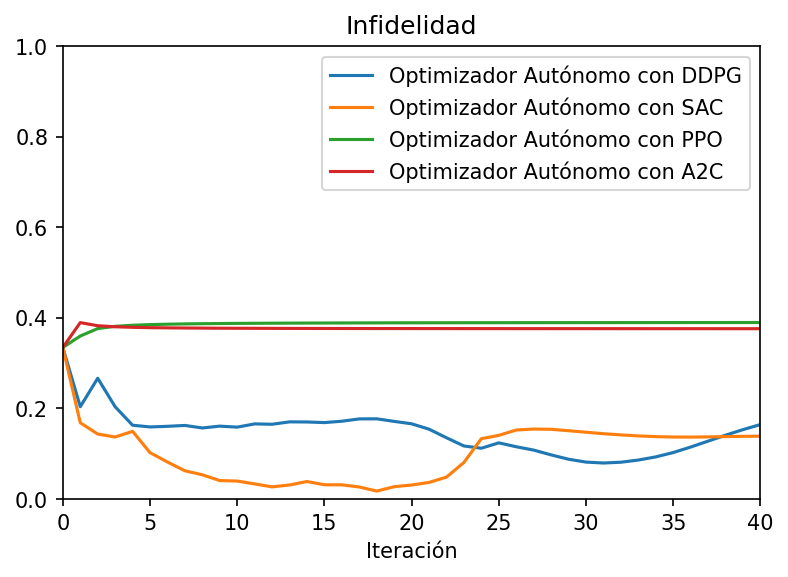

In [22]:
from datetime import datetime
datetime=datetime.now().strftime("%Y%m%d%H%M%S")

plt.figure(figsize=(6, 4), dpi=150)

plt.title('Infidelidad')
#plt.plot(sgd_valsppo, label='SGD')
#plt.plot(momentum_valsppo, label='Momentum')
#plt.plot(adam_valsppo, label='Adam')
#plt.plot(lbfgs_valsppo, label='LBFGS')
plt.plot(ao_valsddpg, label='Optimizador Autónomo con DDPG')
plt.plot(ao_valssac, label='Optimizador Autónomo con SAC')
plt.plot(ao_valsppo, label='Optimizador Autónomo con PPO')
plt.plot(ao_valsa2c, label='Optimizador Autónomo con A2C')

plt.xlabel('Iteración')
plt.legend()
plt.xlim([0,40])
plt.ylim([0, 1])
filename = f"todos_{datetime}.png"
plt.savefig(filename)
plt.show()

# Promedio de varias ejecuciones

In [23]:
problems = [infidelidad.infidelity() for _ in range(15)]

C:\Users\angel\Escritorio\LearningToOptimize\infidelidad.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float,requires_grad=True)


In [24]:
iterations=41
all_resultsddpg = {}
for problem in problems:
  resultsddpg = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policyddpg)
  for k, v in resultsddpg.items():
    if k not in all_resultsddpg:
      all_resultsddpg[k] = []
    all_resultsddpg[k].append(v)

SGD best loss: -1.1920928955078125e-07
Momentum best loss: 6.091594696044922e-05
Adam best loss: 4.589557647705078e-06
LBFGS best loss: 6.258487701416016e-06
Autonomous Optimizer best loss: 0.0028796792030334473
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.0013090968132019043
Adam best loss: 9.322166442871094e-05
LBFGS best loss: 1.5437602996826172e-05
Autonomous Optimizer best loss: 0.024521470069885254
SGD best loss: 3.2186508178710938e-06
Momentum best loss: 0.11306262016296387
Adam best loss: 7.277727127075195e-05
LBFGS best loss: 3.731250762939453e-05
Autonomous Optimizer best loss: 0.045189857482910156
SGD best loss: -2.384185791015625e-07
Momentum best loss: 0.00037354230880737305
Adam best loss: 1.722574234008789e-05
LBFGS best loss: 8.225440979003906e-06
Autonomous Optimizer best loss: 0.15940439701080322
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.031093358993530273
Adam best loss: 0.0006524324417114258
LBFGS best loss: 5.781650543212891e-06
A

In [25]:
averaged_resultsddpg = {}
for name, result_list in all_resultsddpg.items():
  averaged = np.mean([res[0] for res in result_list], axis=0) 
  stdev = np.std([res[0] for res in result_list], axis=0)
  mini=np.min([res[0] for res in result_list], axis=0)
  maxi=np.max([res[0] for res in result_list], axis=0)
  perc=np.percentile([res[0] for res in result_list],5,axis=0)
  perc1=np.percentile([res[0] for res in result_list],95,axis=0)
  averaged_resultsddpg[name] = (averaged,stdev,mini,maxi,perc,perc1, result_list[0][1])

In [26]:
all_resultssac = {}
for problem in problems:
  resultssac = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policysac)
  for k, v in resultssac.items():
    if k not in all_resultssac:
      all_resultssac[k] = []
    all_resultssac[k].append(v)

SGD best loss: -1.1920928955078125e-07
Momentum best loss: 6.091594696044922e-05
Adam best loss: 4.589557647705078e-06
LBFGS best loss: 6.258487701416016e-06
Autonomous Optimizer best loss: 0.0017426013946533203
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.0013090968132019043
Adam best loss: 9.322166442871094e-05
LBFGS best loss: 1.5437602996826172e-05
Autonomous Optimizer best loss: 0.0032396912574768066
SGD best loss: 3.2186508178710938e-06
Momentum best loss: 0.11306262016296387
Adam best loss: 7.277727127075195e-05
LBFGS best loss: 3.731250762939453e-05
Autonomous Optimizer best loss: 0.1708248257637024
SGD best loss: -2.384185791015625e-07
Momentum best loss: 0.00037354230880737305
Adam best loss: 1.722574234008789e-05
LBFGS best loss: 8.225440979003906e-06
Autonomous Optimizer best loss: 0.0006365180015563965
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.031093358993530273
Adam best loss: 0.0006524324417114258
LBFGS best loss: 5.781650543212891e-06


In [27]:
averaged_resultssac = {}
for name, result_list in all_resultssac.items():
  averaged = np.mean([res[0] for res in result_list], axis=0)
  stdev = np.std([res[0] for res in result_list], axis=0)
  mini=np.min([res[0] for res in result_list], axis=0)
  maxi=np.max([res[0] for res in result_list], axis=0)
  perc=np.percentile([res[0] for res in result_list],5,axis=0)
  perc1=np.percentile([res[0] for res in result_list],95,axis=0)
  averaged_resultssac[name] = (averaged, stdev,mini,maxi,perc,perc1, result_list[0][1])

In [28]:
all_resultsa2c = {}
for problem in problems:
  resultsa2c = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policya2c)
  for k, v in resultsa2c.items():
    if k not in all_resultsa2c:
      all_resultsa2c[k] = []
    all_resultsa2c[k].append(v)

SGD best loss: -1.1920928955078125e-07
Momentum best loss: 6.091594696044922e-05
Adam best loss: 4.589557647705078e-06
LBFGS best loss: 6.258487701416016e-06
Autonomous Optimizer best loss: 0.07035458087921143
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.0013090968132019043
Adam best loss: 9.322166442871094e-05
LBFGS best loss: 1.5437602996826172e-05
Autonomous Optimizer best loss: 0.019253313541412354
SGD best loss: 3.2186508178710938e-06
Momentum best loss: 0.11306262016296387
Adam best loss: 7.277727127075195e-05
LBFGS best loss: 3.731250762939453e-05
Autonomous Optimizer best loss: 0.10729420185089111
SGD best loss: -2.384185791015625e-07
Momentum best loss: 0.00037354230880737305
Adam best loss: 1.722574234008789e-05
LBFGS best loss: 8.225440979003906e-06
Autonomous Optimizer best loss: 0.22429096698760986
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.031093358993530273
Adam best loss: 0.0006524324417114258
LBFGS best loss: 5.781650543212891e-06
Auto

In [29]:
averaged_resultsa2c = {}
for name, result_list in all_resultsa2c.items():
  averaged = np.mean([res[0] for res in result_list], axis=0)
  stdev = np.std([res[0] for res in result_list], axis=0)
  mini=np.min([res[0] for res in result_list], axis=0)
  maxi=np.max([res[0] for res in result_list], axis=0)
  perc=np.percentile([res[0] for res in result_list],5,axis=0)
  perc1=np.percentile([res[0] for res in result_list],95,axis=0)
  averaged_resultsa2c[name] = (averaged, stdev,mini,maxi,perc,perc1, result_list[0][1])

In [30]:
all_resultsppo = {}
for problem in problems:
  resultsppo = infidelidad.run_all_optimizers(problem, iterations, infidelity_tune, infidelity_policyppo)
  for k, v in resultsppo.items():
    if k not in all_resultsppo:
      all_resultsppo[k] = []
    all_resultsppo[k].append(v)

SGD best loss: -1.1920928955078125e-07
Momentum best loss: 6.091594696044922e-05
Adam best loss: 4.589557647705078e-06
LBFGS best loss: 6.258487701416016e-06
Autonomous Optimizer best loss: 0.05921602249145508
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.0013090968132019043
Adam best loss: 9.322166442871094e-05
LBFGS best loss: 1.5437602996826172e-05
Autonomous Optimizer best loss: 0.027421414852142334
SGD best loss: 3.2186508178710938e-06
Momentum best loss: 0.11306262016296387
Adam best loss: 7.277727127075195e-05
LBFGS best loss: 3.731250762939453e-05
Autonomous Optimizer best loss: 0.19682061672210693
SGD best loss: -2.384185791015625e-07
Momentum best loss: 0.00037354230880737305
Adam best loss: 1.722574234008789e-05
LBFGS best loss: 8.225440979003906e-06
Autonomous Optimizer best loss: 0.33637428283691406
SGD best loss: -1.1920928955078125e-07
Momentum best loss: 0.031093358993530273
Adam best loss: 0.0006524324417114258
LBFGS best loss: 5.781650543212891e-06
Auto

In [31]:
averaged_resultsppo = {}
for name, result_list in all_resultsppo.items():
  averaged = np.mean([res[0] for res in result_list], axis=0)
  stdev = np.std([res[0] for res in result_list], axis=0)
  mini=np.min([res[0] for res in result_list], axis=0)
  maxi=np.max([res[0] for res in result_list], axis=0)
  perc=np.percentile([res[0] for res in result_list],5,axis=0)
  perc1=np.percentile([res[0] for res in result_list],95,axis=0)
  averaged_resultsppo[name] = (averaged, stdev, mini, maxi,perc,perc1, result_list[0][1])

## Gráfico de las infidelidades promedio de cada optimizador de RL

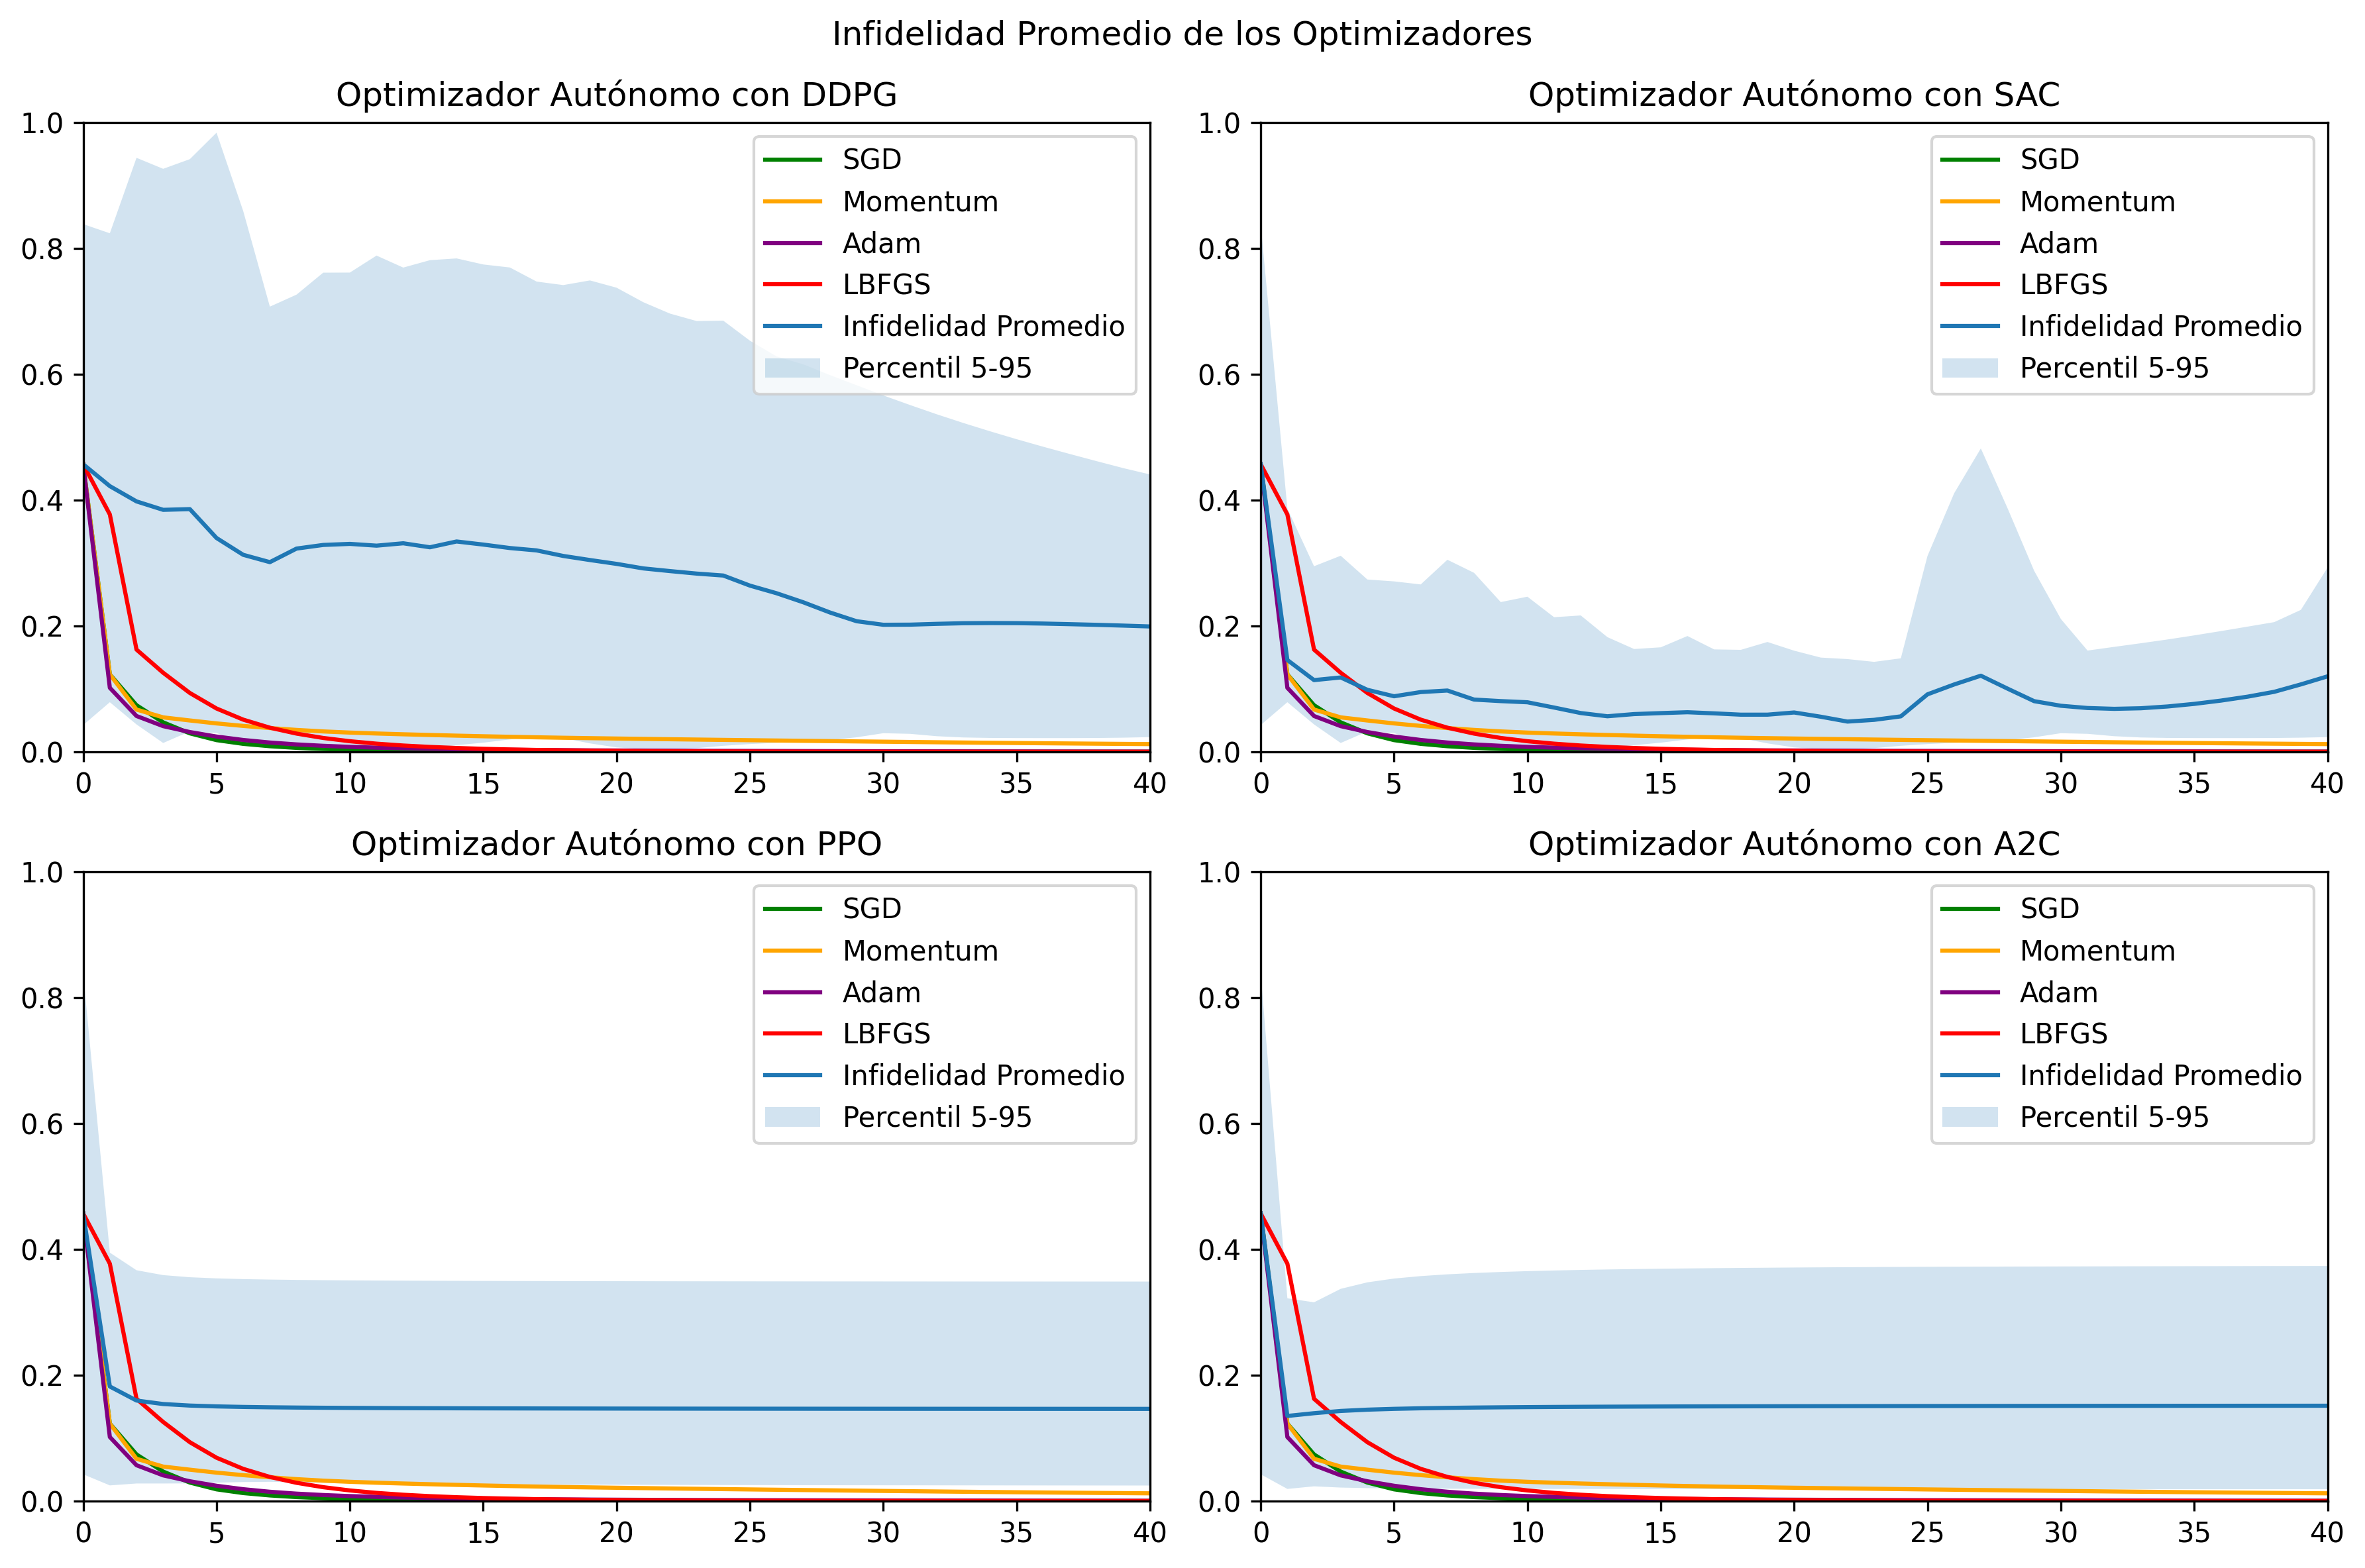

In [35]:
from datetime import datetime
datetime=datetime.now().strftime("%Y%m%d%H%M%S")
fig, axs = plt.subplots(2, 2, figsize=(12, 8),dpi=300)

fig.suptitle('Infidelidad Promedio de los Optimizadores') 

axs[0, 0].set_title('Optimizador Autónomo con DDPG')
axs[0, 0].plot(averaged_resultsddpg["sgd"][0], color='green', label='SGD')
axs[0, 0].plot(averaged_resultsddpg["momentum"][0], color='orange', label='Momentum')
axs[0, 0].plot(averaged_resultsddpg["adam"][0], color='purple', label='Adam')
axs[0, 0].plot(averaged_resultsddpg["lbfgs"][0],color='red', label='LBFGS')
axs[0, 0].plot(averaged_resultsddpg["ao"][0],label="Infidelidad Promedio")
axs[0,0].fill_between(range(len(averaged_resultsddpg["ao"][0])),averaged_resultsddpg["ao"][4],
                 averaged_resultsddpg["ao"][5],alpha=0.2, label="Percentil 5-95")
axs[0,0].set_ylim([0,1])
axs[0,0].set_xlim([0,40])
axs[0,0].legend()

axs[0, 1].set_title('Optimizador Autónomo con SAC')  
axs[0, 1].plot(averaged_resultssac["sgd"][0], color='green', label='SGD')
axs[0, 1].plot(averaged_resultssac["momentum"][0], color='orange', label='Momentum')
axs[0, 1].plot(averaged_resultssac["adam"][0], color='purple', label='Adam')
axs[0, 1].plot(averaged_resultssac["lbfgs"][0],color='red', label='LBFGS')
axs[0, 1].plot(averaged_resultssac["ao"][0],label="Infidelidad Promedio")
axs[0,1].fill_between(range(len(averaged_resultssac["ao"][0])),averaged_resultsddpg["ao"][4],
                 averaged_resultssac["ao"][5],alpha=0.2,label="Percentil 5-95")
axs[0,1].set_ylim([0,1])
axs[0,1].set_xlim([0,40])
axs[0,1].legend()

axs[1, 0].set_title('Optimizador Autónomo con PPO')
axs[1, 0].plot(averaged_resultsppo["sgd"][0], color='green', label='SGD')
axs[1, 0].plot(averaged_resultsppo["momentum"][0], color='orange', label='Momentum')
axs[1, 0].plot(averaged_resultsppo["adam"][0], color='purple', label='Adam')
axs[1, 0].plot(averaged_resultsppo["lbfgs"][0],color='red', label='LBFGS')
axs[1,0].plot(averaged_resultsppo["ao"][0],label="Infidelidad Promedio")
axs[1,0].fill_between(range(len(averaged_resultsppo["ao"][0])), averaged_resultsppo["ao"][4],
                 averaged_resultsppo["ao"][5],alpha=0.2, label="Percentil 5-95")
axs[1,0].set_ylim([0,1])
axs[1,0].set_xlim([0,40])
axs[1,0].legend()

axs[1, 1].set_title('Optimizador Autónomo con A2C')
plt.plot(averaged_resultsa2c["sgd"][0], color='green', label='SGD')
plt.plot(averaged_resultsa2c["momentum"][0], color='orange', label='Momentum')
plt.plot(averaged_resultsa2c["adam"][0], color='purple', label='Adam')
plt.plot(averaged_resultsa2c["lbfgs"][0],color='red', label='LBFGS')
axs[1,1].plot(averaged_resultsa2c["ao"][0],label="Infidelidad Promedio")
axs[1,1].fill_between(range(len(averaged_resultsa2c["ao"][0])), averaged_resultsa2c["ao"][4],
                 averaged_resultsa2c["ao"][5],alpha=0.2, label="Percentil 5-95")
axs[1,1].set_ylim([0,1])
axs[1,1].set_xlim([0,40])

plt.tight_layout()
plt.legend()
filename = f"final_{datetime}.pdf"
plt.savefig(filename)
plt.show()

In [3]:
%load_ext tensorboard
%tensorboard --logdir tb_logs/infidelity

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 4204.